In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
num_employees = {'E': 5, 'S': 20, 'M': 100, 'J': 400}
lambda_rates = {'E': 1.2, 'S': 1.1, 'M': 1.0, 'J': 0.9}
kappa = 0.1  # Additional rate for female employees
gamma = 1.0  # Preference for seniority in promotions
alpha = 0.05  # Bias towards male employees in promotions

In [4]:
# Function to initialize the state of the corporation
def initialize_state(num_employees):
    state = {level: {'male': num_employees[level] // 2, 'female': num_employees[level] // 2} for level in num_employees}
    return state


In [7]:
# Function for employee retirement
def retire_employee(level, gender, state):
    if gender == 'female' and np.random.rand() < kappa:
        state[level][gender] = max(0, state[level][gender] - 1)
    elif np.random.exponential(1 / lambda_rates[level]) < 1:
        state[level][gender] = max(0, state[level][gender] - 1)

# Function for employee promotion
def promote_employee(from_level, to_level, state):
    if state[from_level]['male'] > 0 and state[from_level]['female'] > 0:
        promotion_bias = np.random.rand()
        bias_factor = np.exp(alpha) / (1 + np.exp(alpha))
        if promotion_bias < bias_factor:
            promoted_gender = 'male'
        else:
            promoted_gender = 'female'
        state[from_level][promoted_gender] = max(0, state[from_level][promoted_gender] - 1)
        state[to_level][promoted_gender] += 1

def run_simulation(state, steps=1000):
    history = {level: {'male': [], 'female': []} for level in state}

    for _ in range(steps):
        for level in ['J', 'M', 'S', 'E']:
            for gender in ['male', 'female']:
                retire_employee(level, gender, state)

        # Handle promotions
        for level_from, level_to in zip(['J', 'M', 'S'], ['M', 'S', 'E']):
            promote_employee(level_from, level_to, state)

        # Record state
        for level in state:
            for gender in ['male', 'female']:
                history[level][gender].append(state[level][gender])

    return state, history

def plot_results(history):
    levels = ['J', 'M', 'S', 'E']
    for level in levels:
        plt.plot(history[level]['male'], label=f'Male {level}')
        plt.plot(history[level]['female'], label=f'Female {level}')

    plt.xlabel('Time Steps')
    plt.ylabel('Number of Employees')
    plt.title('Gender Distribution Over Time by Corporate Level')
    plt.legend()
    plt.show()

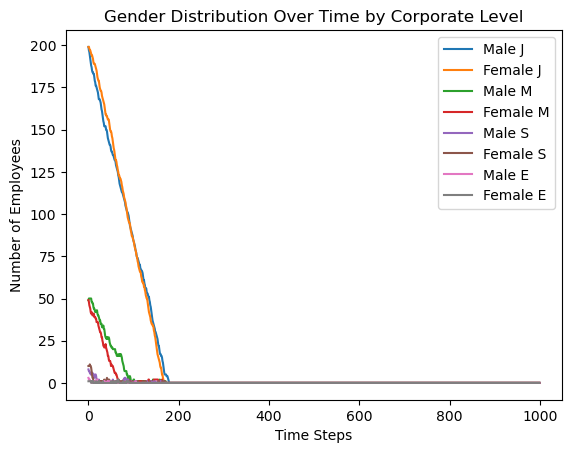

In [8]:
# Main Execution
corporate_state = initialize_state(num_employees)
final_state, history = run_simulation(corporate_state)
plot_results(history)